<a href="https://colab.research.google.com/github/Sampath844/MLAssignment29-07-2024/blob/main/MachineLearningKNNassignment3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
from scipy.sparse import hstack
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data['text'] = data['Prompt'] + " " + data["Answer"]
data = data[['text','Target']]
data.fillna(" ",inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train.csv'

In [ ]:
#vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(data['text'])
# y = data['Target']

In [4]:
# df_features = pd.DataFrame(X_dense, columns=vectorizer.get_feature_names_out())
# df_features['Target'] = y.values
# df_features.to_csv('features.csv', index=False)
df_features = pd.read_csv("200onlyfeatures.csv") #this is the 200 column vectorized dataset

In [5]:
#A1
def calculate_class_statistics(df_features):
    print("Mean Interclass: ")
    print(df_features.mean(axis=0))  # mean of the interclass data
    print("Standard Deviation Interclass: ")
    print(df_features.std(axis=0))  # standard deviation of interclass data
    print("Intraclass mean:")
    print(df_features.mean(axis=1))
    print("Intraclass STD:")
    print(df_features.std(axis=1))
    print("Centroid distance is: ", np.linalg.norm(st.mean(df_features['about'] - st.mean(df_features["years"]))))  # centroid distance
calculate_class_statistics(df_features)


Mean Interclass: 
10              0.005559
about           0.017246
additionally    0.004877
after           0.008078
all             0.009369
                  ...   
years           0.004528
yes             0.026717
you             0.021345
your            0.010086
Target          0.053575
Length: 201, dtype: float64
Standard Deviation Interclass: 
10              0.053838
about           0.062070
additionally    0.027538
after           0.052152
all             0.051137
                  ...   
years           0.042477
yes             0.133952
you             0.090028
your            0.062117
Target          0.225183
Length: 201, dtype: float64
Intraclass mean:
0        0.020898
1        0.012568
2        0.025808
3        0.000000
4        0.004975
           ...   
16682    0.004975
16683    0.004975
16684    0.017679
16685    0.014893
16686    0.010702
Length: 16687, dtype: float64
Intraclass STD:
0        0.067536
1        0.069579
2        0.065808
3        0.000000
4        0.

In [5]:
df1 = df_features.iloc[0]

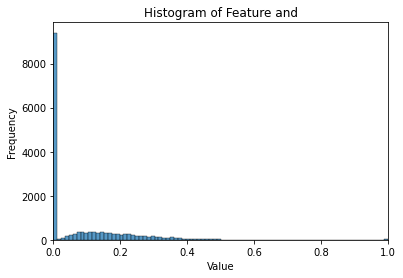

Mean of occurrences is:  1668.7
Standard deviation of the occurrences is:  3249.780394118962


In [6]:
#A2
def plot_feature_histogram(df_features, feature_name):
    sns.histplot(df_features[feature_name])
    plt.xlabel('Value')
    plt.xlim(0, 1)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Feature {feature_name}')
    plt.show()

    np1 = np.histogram(df_features[feature_name])
    np1 = list(np1)
    print("Mean of occurrences is: ", np1[0].mean())
    print("Standard deviation of the occurrences is: ", np1[0].std())
plot_feature_histogram(df_features,"and")


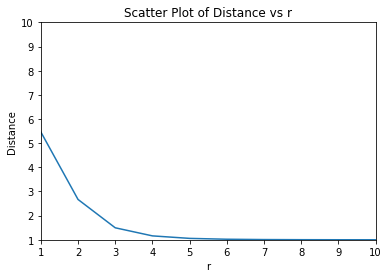

In [7]:
#A3
df1 = df_features.iloc[0]
df2 = df_features.iloc[1]
def calculate_distances(df1, df2):
    r = 1
    dist = 0
    newl = []
    newl2 = []
    for j in range(10):
        for i in range(len(df1)):
            dist += abs((df1.iloc[i] - df2.iloc[i]) ** r)
        dist = dist ** (1 / r)
        newl2.append(r)
        r += 1
        newl.append(dist)
    
    sns.lineplot(y=newl, x=newl2)
    plt.ylabel('Distance')
    plt.xlabel('r')
    plt.title('Scatter Plot of Distance vs r')
    plt.xlim(1, 10)
    plt.ylim(1, 10)
    plt.show()
calculate_distances(df1,df2)





Accuracy:  0.9382863990413421
Training:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11064
           1       0.72      0.21      0.32       616

    accuracy                           0.95     11680
   macro avg       0.84      0.60      0.65     11680
weighted avg       0.94      0.95      0.94     11680

[[11014    50]
 [  489   127]]
Testing:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4729
           1       0.33      0.11      0.17       278

    accuracy                           0.94      5007
   macro avg       0.64      0.55      0.57      5007
weighted avg       0.92      0.94      0.92      5007

[[4667   62]
 [ 247   31]]
2th neighbor is greater
4th neighbor is greater
5th neighbor is greater
6th neighbor is greater
7th neighbor is greater
8th neighbor is greater
9th neighbor is greater
10th neighbor is greater


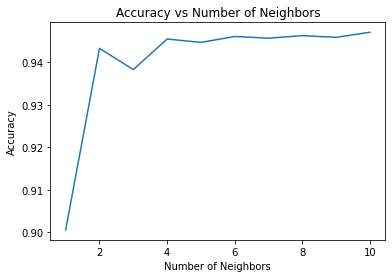

In [23]:
#A4
from sklearn.metrics import confusion_matrix,classification_report #A9
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
def knn_model(df_features):
    X = df_features.drop('Target', axis=1)
    Y = df_features["Target"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, Y_train)
    
    # Testing accuracy
    print("Accuracy: ", neigh.score(X_test, Y_test))

    # Training and testing classification report
    print("Training:")
    y_pred1 = neigh.predict(X_train)
    print(classification_report(Y_train, y_pred1))
    print(confusion_matrix(Y_train, y_pred1))

    print("Testing:")
    y_pred = neigh.predict(X_test)
    print(classification_report(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))

    # Find the best neighbor value
    best_neighbor(neigh, X_train, Y_train, X_test, Y_test)
    plot_accuracy_vs_neighbors(X_train, Y_train, X_test, Y_test)
knn_model(df_features)


In [16]:
def best_neighbor(neigh, X_train, Y_train, X_test, Y_test):
    for i in range(1, 11):
        newneigh = KNeighborsClassifier(n_neighbors=i)
        newneigh.fit(X_train, Y_train)
        if newneigh.score(X_test, Y_test) > neigh.score(X_test, Y_test):
            print(f"{i}th neighbor is greater")


In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
neigh.score(X_test,Y_test) #accuracy of KNN


0.9364889155182744

In [14]:
# y_pred = neigh.predict(X_test)


In [40]:
# print("Training") #A9
# y_pred1 = neigh.predict(X_train)
# print(classification_report(Y_train , y_pred1))
# print(confusion_matrix(Y_train,y_pred1))

Training
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     11080
           1       0.64      0.20      0.30       600

    accuracy                           0.95     11680
   macro avg       0.80      0.60      0.64     11680
weighted avg       0.94      0.95      0.94     11680

[[11014    66]
 [  481   119]]


In [15]:
from sklearn.metrics import confusion_matrix,classification_report #A9
# print("Testing")
# print(classification_report(Y_test,y_pred))
# print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4713
           1       0.37      0.12      0.18       294

    accuracy                           0.94      5007
   macro avg       0.66      0.55      0.57      5007
weighted avg       0.91      0.94      0.92      5007

[[4655   58]
 [ 260   34]]


In [1]:
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train,Y_train)
# for i in range (1,11):
#   newneigh = KNeighborsClassifier(n_neighbors=i)
#   newneigh.fit(X_train,Y_train)
#   if(newneigh.score(X_test,Y_test) > neigh.score(X_test,Y_test)):
#     print(f"{i}th neighbor is greater")

NameError: name 'KNeighborsClassifier' is not defined

In [22]:
def plot_accuracy_vs_neighbors(X_train, Y_train, X_test, Y_test):
    newl = []
    for i in range(1, 11):
        newneigh = KNeighborsClassifier(n_neighbors=i)
        newneigh.fit(X_train, Y_train)
        newl.append(newneigh.score(X_test, Y_test))
    
    plt.plot(range(1, 11), newl)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Neighbors')
    plt.show()
